# Multiple Linear Regression

## Importing the necessary Libraries and Packages

In [8]:
from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.linear_model import LinearRegression # regression algorithm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # accuracy metric
import numpy as np # data processing
import pandas as pd # data processing 
import matplotlib.pyplot as plt # data plotting

## Importing the csv file as a DataFrame

In [2]:
df = pd.read_csv("Dataset/Startups.csv")
df.head()

,Research,Marketing,Profit
0,165349.20,401784.10,192261.83
1,162597.70,373898.53,191792.06
2,153441.51,357934.54,191050.39
3,144372.41,323199.62,182901.99
4,142107.34,300168.42,166187.94


## Exploratory Data Analysis

In [3]:
df.describe()

,Research,Marketing,Profit
count,44.000000,44.000000,44.000000
mean,81745.530455,177546.896364,119784.630227
std,41341.933344,90204.226315,34297.025963
min,15505.730000,28334.720000,65200.330000
25%,53226.980000,114425.525000,96762.390000
50%,75791.365000,168043.995000,109543.120000
75%,115878.517500,222098.650000,144725.037500
max,165349.200000,401784.100000,192261.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Research   44 non-null     float64
 1   Marketing  44 non-null     float64
 2   Profit     44 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


In [5]:
df.columns

Index(['Research', 'Marketing', 'Profit'], dtype='object')

In [6]:
df.corr()

,Research,Marketing,Profit
Research,1.000000,0.973596,0.975669
Marketing,0.973596,1.000000,0.990908
Profit,0.975669,0.990908,1.000000


## Now taking 2 parts from the dataset:
### X : which contains all the data except the <b>Profit</b> column<br>y : which contains only the <b>Profit</b> column 

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualisation of the Data

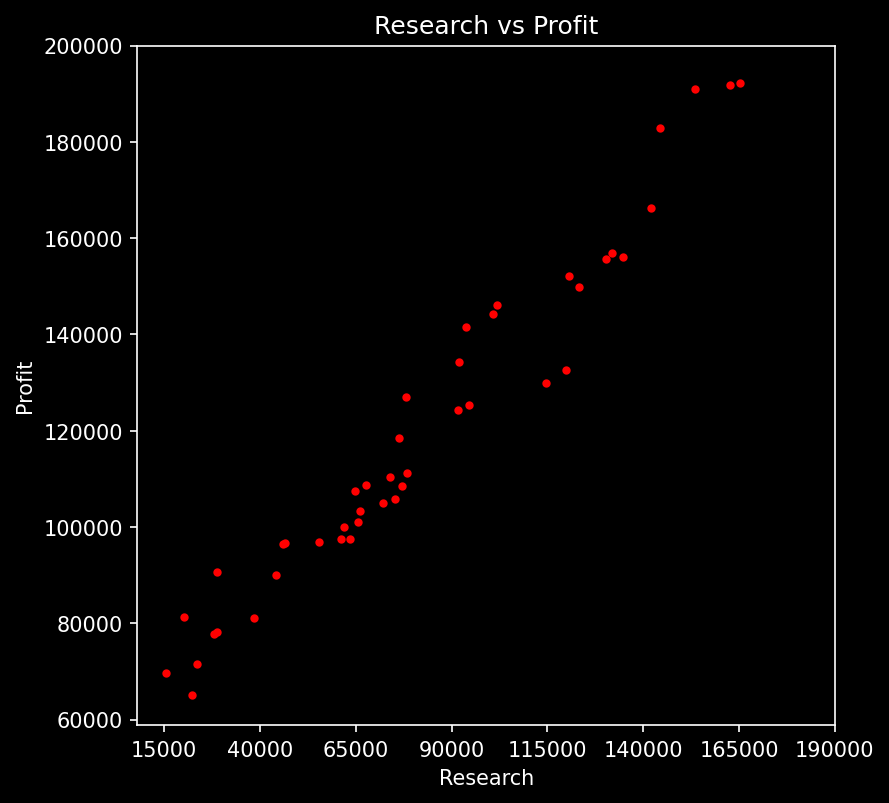

In [14]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Research = df["Research"]
Profit = df["Profit"]
plt.scatter(Research, Profit,marker=".", color="red")
plt.xticks(np.arange(15000, 200000, 25000))
plt.yticks(np.arange(60000,220000,20000))
plt.title("Research vs Profit")
plt.xlabel("Research")
plt.ylabel("Profit")
plt.savefig("Images/Research_vs_Profit.png",bbox_inches='tight')

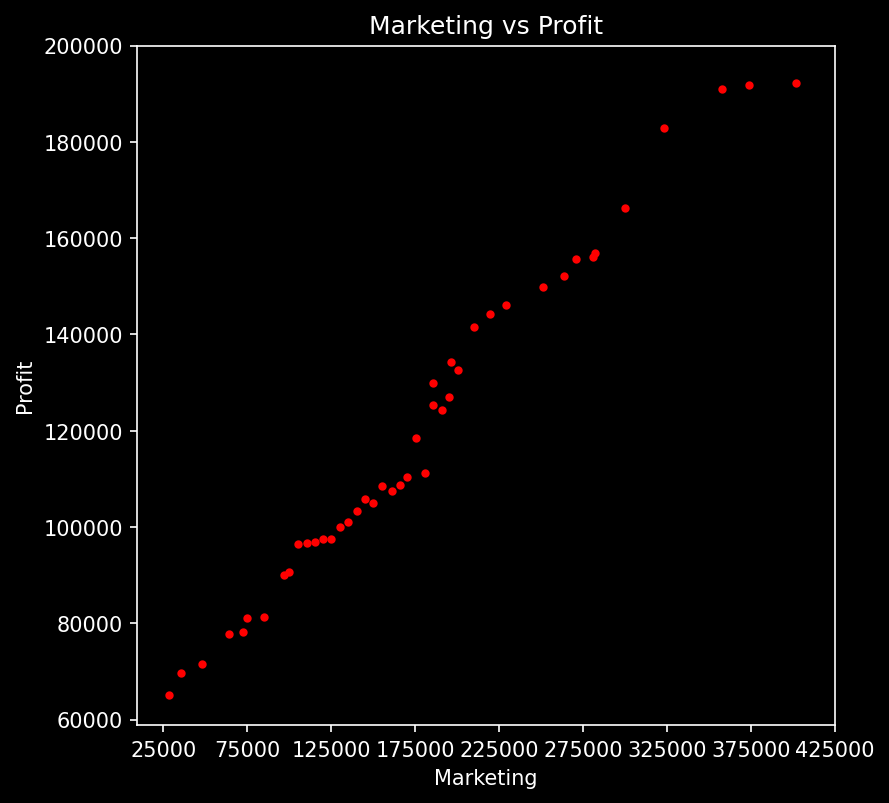

In [15]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Marketing = df["Marketing"]
Profit = df["Profit"]
plt.scatter(Marketing, Profit,marker=".", color="red")
plt.xticks(np.arange(25000, 475000, 50000))
plt.yticks(np.arange(60000,220000,20000))
plt.title("Marketing vs Profit")
plt.xlabel("Marketing")
plt.ylabel("Profit")
plt.savefig("Images/Marketing_vs_Profit.png",bbox_inches='tight')

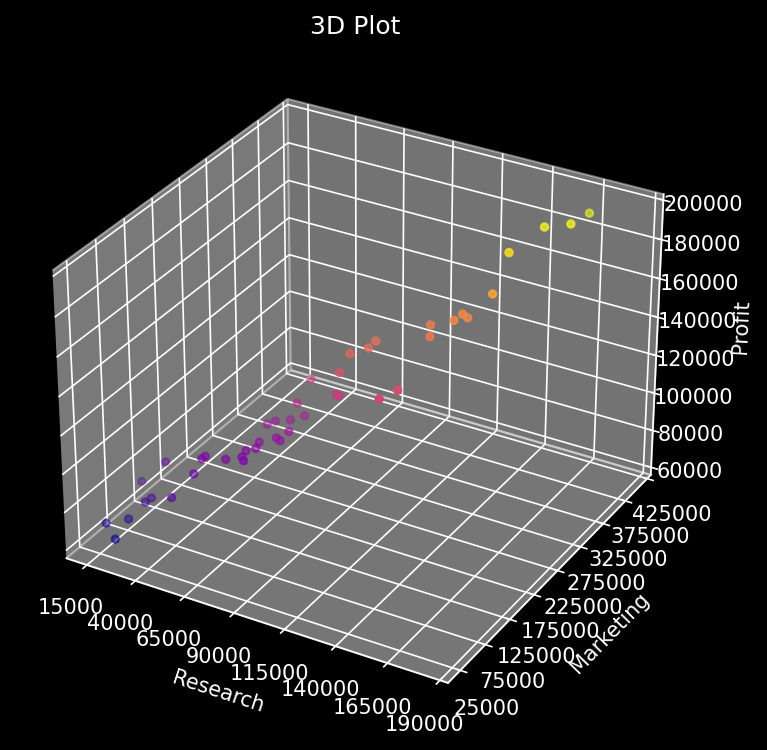

In [20]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
ax = plt.axes(projection ='3d') # syntax for 3-D projection
ax.scatter3D(Research, Marketing, Profit, c=Profit, marker="." ,cmap='plasma', s=50)
ax.set_xticks(np.arange(15000, 200000, 25000))
ax.set_yticks(np.arange(25000, 475000, 50000))
ax.set_zticks(np.arange(60000,220000,20000))
ax.set_xlabel("Research")
ax.set_ylabel("Marketing")
ax.set_zlabel("Profit")
ax.set_title("3D Plot")
plt.savefig("Images/3D_Plot.png",bbox_inches='tight')

## Split the X and y dataframes for test and training

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

## Implementation of the Model

In [8]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [19]:
print(y_pred)
print(y_test)

[101460.31346395  82065.94285242 106574.37015125 166195.39057418
 138413.33554349 109829.84940474 105105.83667797 135570.25105953
  83015.01235638 100517.13675037 102987.00321938 120266.86472295
  72526.89141926 184401.94181921  66821.25790121]
[ 97483.56  81229.06 103282.38 166187.94 146121.95 105733.54 101004.64
 144259.4   81005.76  97427.84  99937.59 111313.02  71498.49 191050.39
  65200.33]


## Performance of the Model

In [9]:
# Printing the coefficient of determination of the regression
print("The coefficient of determination :", r2_score(y_test,y_pred))

The coefficient of determination : 0.9806397350397471


## Additional Performance Metrics

In [10]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error (MAE) : 3940.528738121537
Mean Squared Error (MSE) : 23120919.49796699
Root Mean Squared Error (RMSE) : 4808.421726301364
Mean Absolute Percentage Error (MAPE) : 0.03445709379204582
